In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns

from utils import sum_dicts
from plot import get_dataset_results, print_results
from constants import DATASETS, SKEWS, NR_PARTIES

sns.set_theme()

# Results + Evaluation

In [3]:
def get_experiment_results(skew_type, hp_name, versions=(0, 1, 2), plot=True):
    lr_agg_es = {}
    X = []
    y = []
    y_hat = []
    for d in DATASETS:
        agg_es, (X_d, y_d, y_hat_d) = \
            get_dataset_results(
                d, SKEWS[skew_type], NR_PARTIES, type_of_skew=skew_type,
                hp_name=hp_name, versions=versions, plot=plot
        )
        lr_agg_es = sum_dicts(lr_agg_es, agg_es)
        X.extend(X_d)
        y.extend(y_d)
        y_hat.extend(y_hat_d)

    return lr_agg_es, (X, y, y_hat)

## Learning rate

### Feature skew - Learning Rate

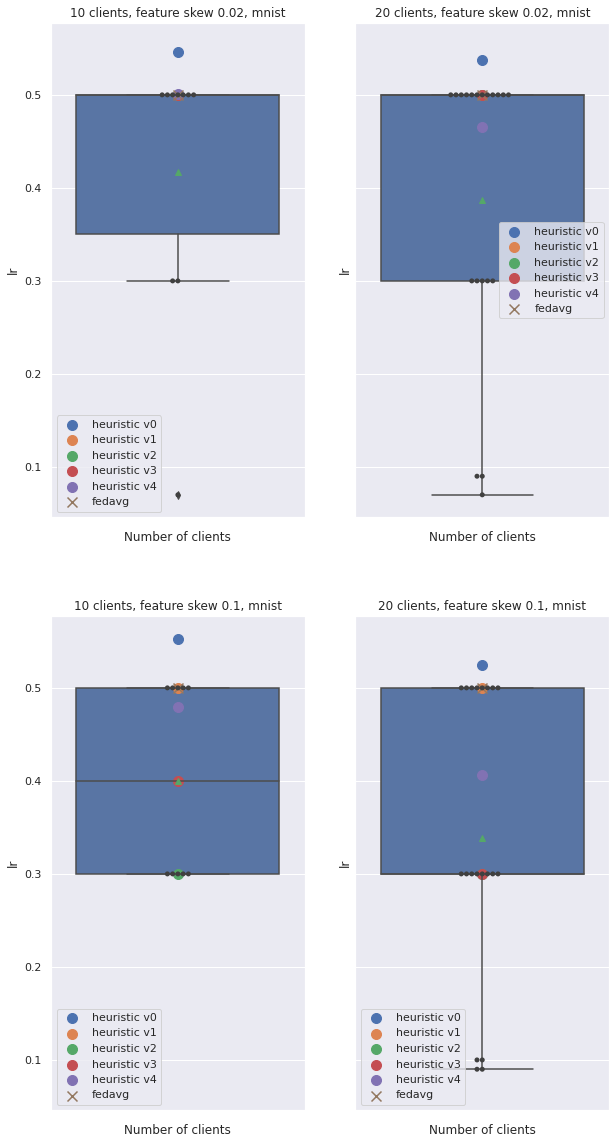

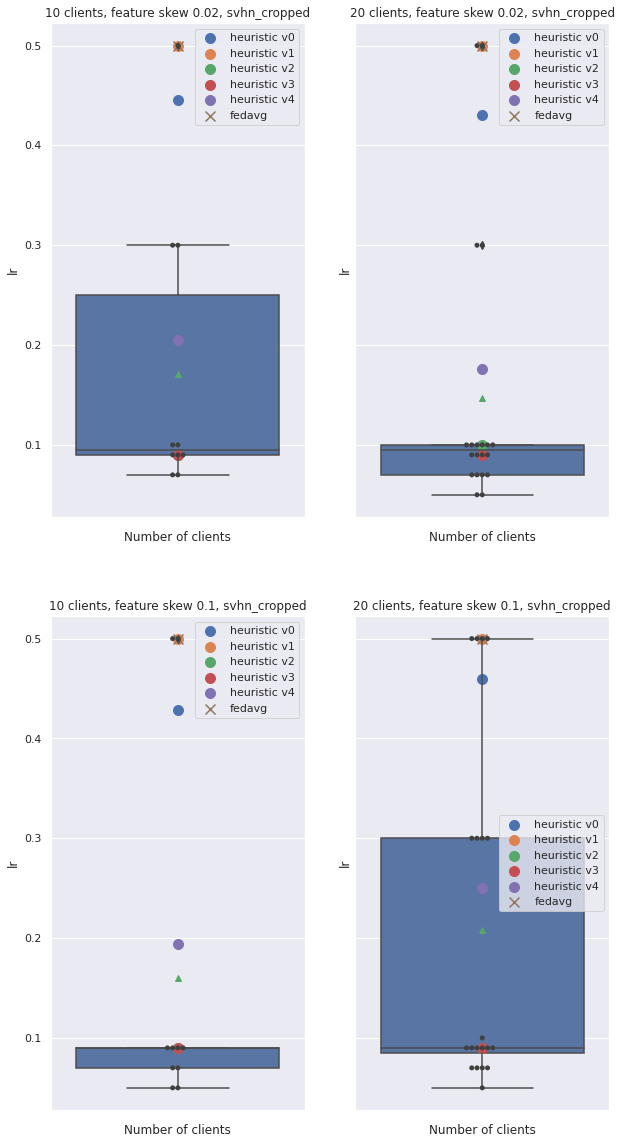

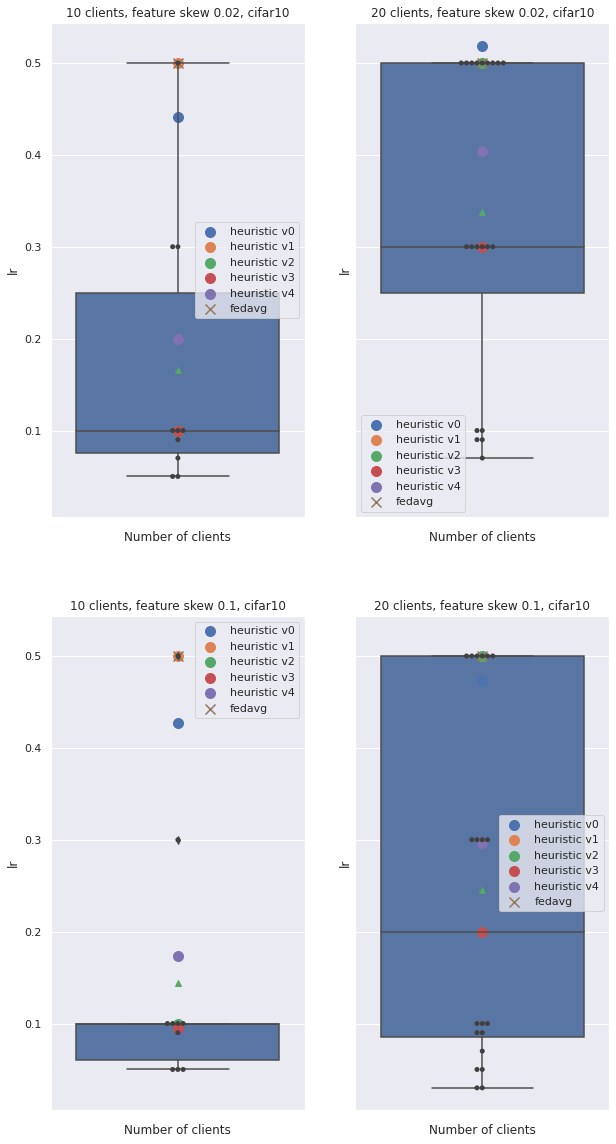

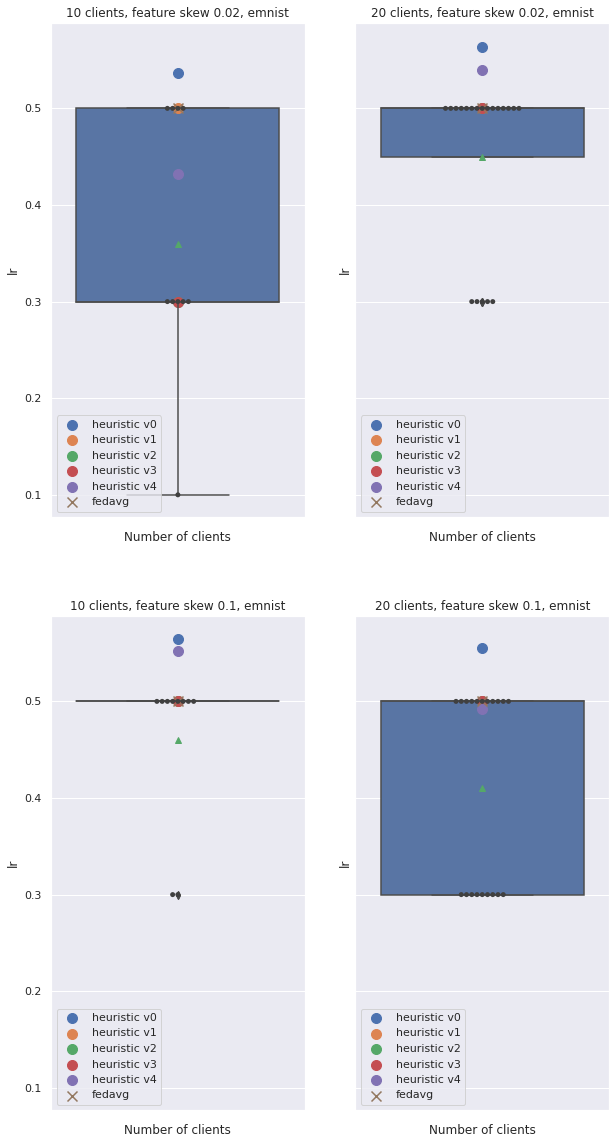

In [4]:
lr_feature_agg_es, (X_lr_feature, y_lr_feature, y_hat_lr_feature) = \
    get_experiment_results(skew_type="feature", hp_name="lr",
                           versions=(0, 1, 2, 3, 4), plot=True)

In [5]:
print_results(
    lr_feature_agg_es,
    X_lr_feature,
    y_lr_feature,
    y_hat_lr_feature,
    "lr"
)

HEURISTIC RESULTS
Heuristic 0 MAE: 0.050 ± 0.017 (Bias: +0.000)
Heuristic 0 accuracy: 1.0
Heuristic 1 MAE: 0.000 ± 0.000 (Bias: +0.000)
Heuristic 1 accuracy: 1.0
Heuristic 2 MAE: 0.189 ± 0.182 (Bias: -0.189)
Heuristic 2 accuracy: 0.4375
Heuristic 3 MAE: 0.215 ± 0.172 (Bias: -0.215)
Heuristic 3 accuracy: 0.375
Heuristic 4 MAE: 0.151 ± 0.125 (Bias: -0.140)
Heuristic 4 accuracy: 0.5625
BASELINE RESULTS
Mean MAE: 0.200 ± 0.115 (Bias: -0.200)
Median MAE: 0.214 ± 0.171 (Bias: -0.214)

X [0.5, 0.3, 0.5, 0.3, 0.5, 0.5, 0.07, 0.5, 0.5, 0.5]
y 0.5
y_hat [0.5465099999999999, 0.5, 0.5, 0.5, 0.5006570397878278]
X [0.09, 0.5, 0.09, 0.5, 0.5, 0.5, 0.3, 0.5, 0.5, 0.3, 0.5, 0.5, 0.5, 0.5, 0.3, 0.07, 0.3, 0.5, 0.3, 0.5]
y 0.5
y_hat [0.536945, 0.5, 0.5, 0.5, 0.46551540511720374]
X [0.3, 0.5, 0.5, 0.3, 0.3, 0.3, 0.5, 0.5, 0.3, 0.5]
y 0.5
y_hat [0.5529999999999999, 0.5, 0.3, 0.4, 0.479794771021092]
X [0.3, 0.3, 0.09, 0.5, 0.3, 0.5, 0.5, 0.1, 0.09, 0.5, 0.3, 0.3, 0.5, 0.5, 0.3, 0.5, 0.1, 0.3, 0.5, 0.3]
y 0.

Comments:
- Optimal server learning rate equals 0.5 (largest in grid search) for all settings.
- Maybe big learning rate caused by small client learning rate (0.01)
- Try heuristic where we eliminate the most distant learning rate(s), and take the majority vote or weighted average from remaining

### Label skew - Learning Rate

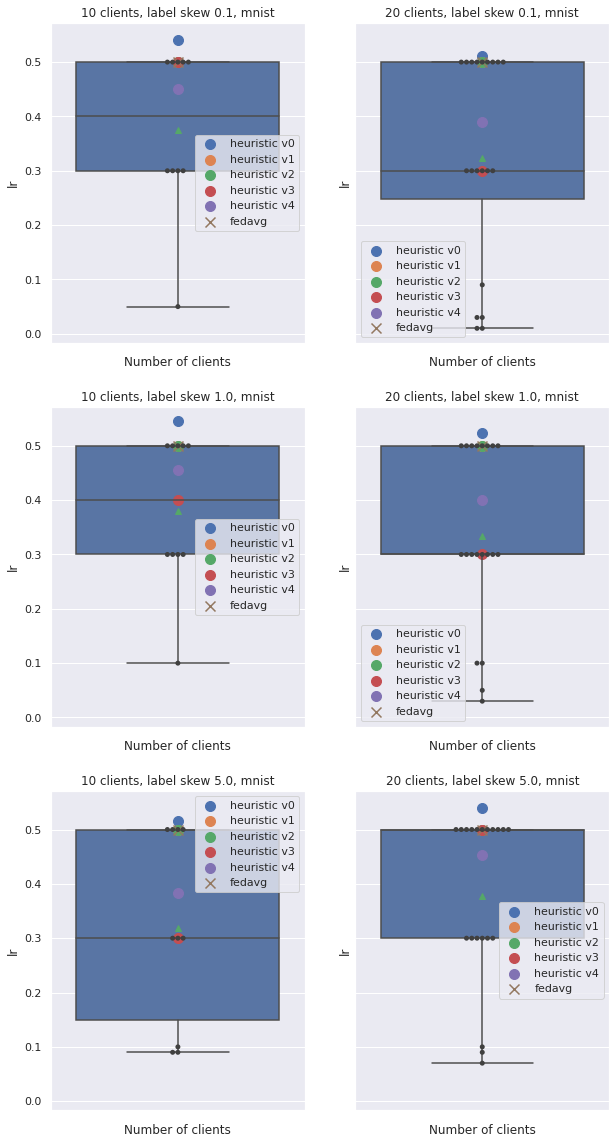

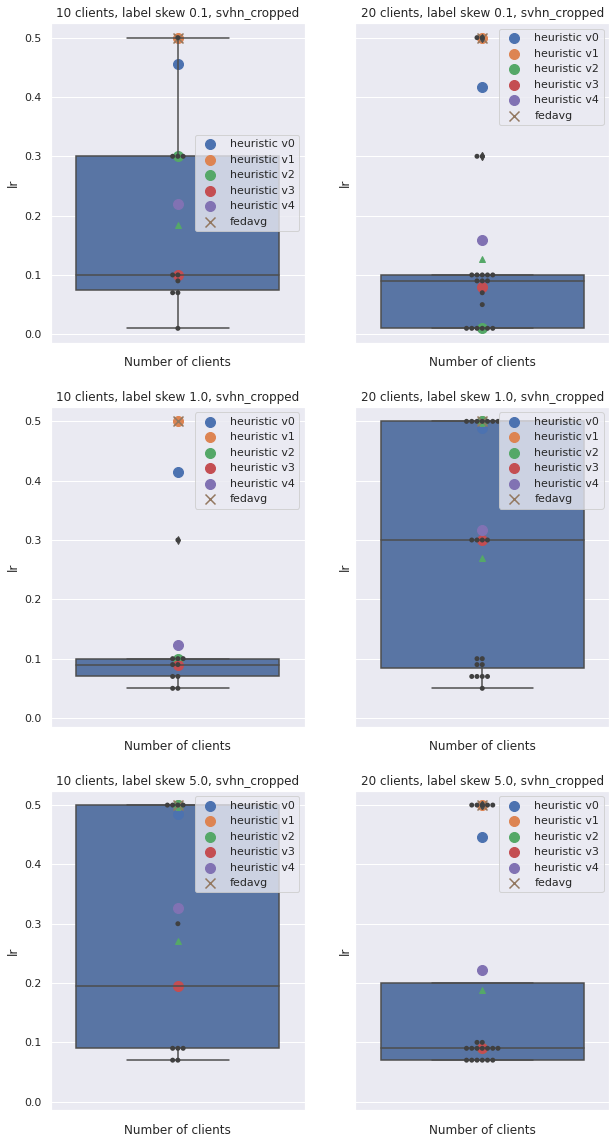

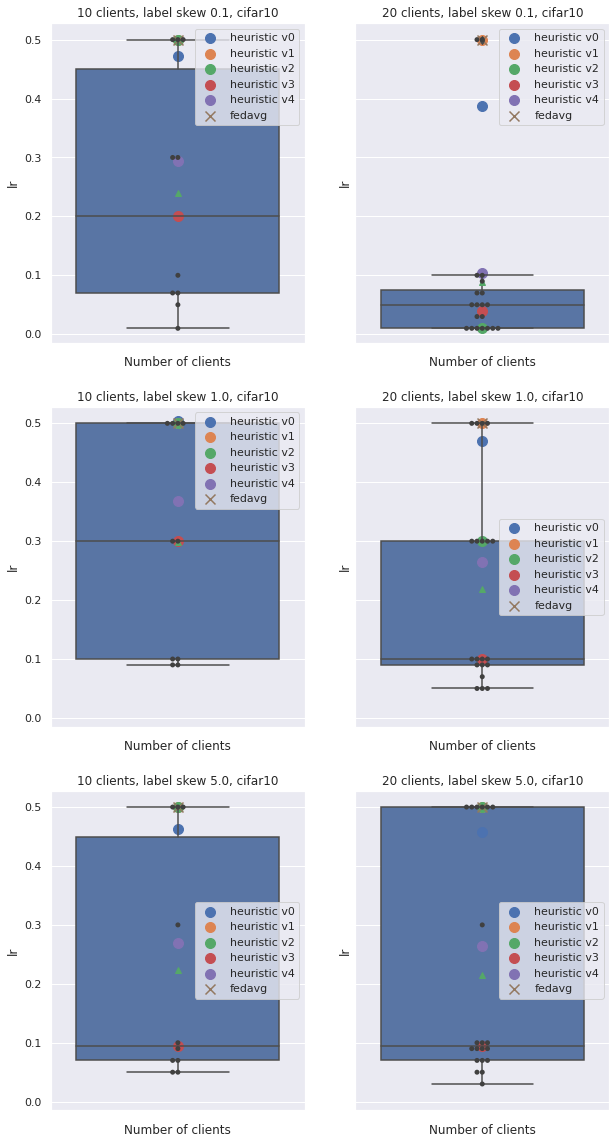

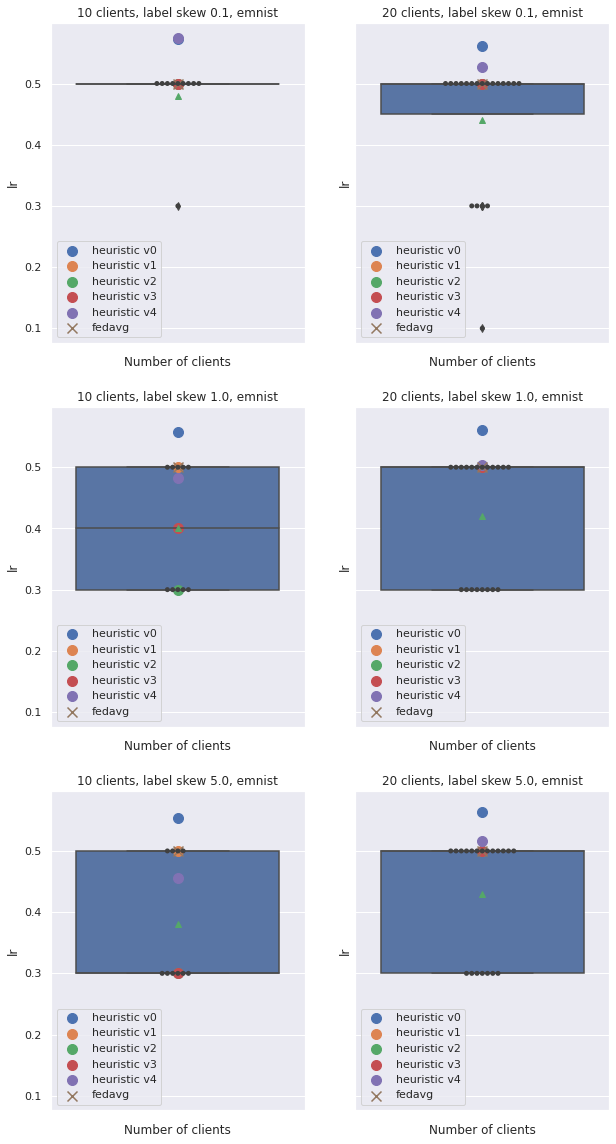

In [6]:
lr_label_agg_es, (X_lr_label, y_lr_label, y_hat_lr_label) = \
    get_experiment_results(skew_type="label", hp_name="lr",
                           versions=(0, 1, 2, 3, 4), plot=True)

In [7]:
print_results(
    lr_label_agg_es,
    X_lr_label,
    y_lr_label,
    y_hat_lr_label,
    "lr",
)

HEURISTIC RESULTS
Heuristic 0 MAE: 0.045 ± 0.026 (Bias: +0.000)
Heuristic 0 accuracy: 0.9583333333333334
Heuristic 1 MAE: 0.000 ± 0.000 (Bias: +0.000)
Heuristic 1 accuracy: 1.0
Heuristic 2 MAE: 0.108 ± 0.169 (Bias: -0.108)
Heuristic 2 accuracy: 0.6666666666666666
Heuristic 3 MAE: 0.221 ± 0.163 (Bias: -0.221)
Heuristic 3 accuracy: 0.3333333333333333
Heuristic 4 MAE: 0.155 ± 0.118 (Bias: -0.145)
Heuristic 4 accuracy: 0.4166666666666667
BASELINE RESULTS
Mean MAE: 0.205 ± 0.109 (Bias: -0.205)
Median MAE: 0.225 ± 0.157 (Bias: -0.225)

X [0.3, 0.5, 0.5, 0.5, 0.3, 0.05, 0.3, 0.3, 0.5, 0.5]
y 0.5
y_hat [0.54075, 0.5, 0.5, 0.5, 0.4497484541551625]
X [0.3, 0.5, 0.3, 0.01, 0.5, 0.5, 0.09, 0.5, 0.3, 0.5, 0.5, 0.3, 0.3, 0.5, 0.03, 0.03, 0.3, 0.01, 0.5, 0.5]
y 0.5
y_hat [0.510495, 0.5, 0.5, 0.3, 0.38916798390658536]
X [0.5, 0.3, 0.3, 0.3, 0.5, 0.5, 0.5, 0.5, 0.1, 0.3]
y 0.5
y_hat [0.5449999999999999, 0.5, 0.5, 0.4, 0.45606992466453133]
X [0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.5, 0.3, 0.1, 0.3, 0.5, 0.3, 0

Comments:
- Optimal server learning rate equals 0.5 for all settings.

### Quantity skew - Learning Rate

File for client 16 in mnist (0.1, 20, qty) does not exist.
File for client 17 in mnist (0.1, 20, qty) does not exist.
File for client 18 in mnist (0.1, 20, qty) does not exist.
File for client 19 in mnist (0.1, 20, qty) does not exist.
File for client 8 in mnist (0.4, 10, qty) does not exist.
File for client 9 in mnist (0.4, 10, qty) does not exist.
File for client 18 in mnist (0.4, 20, qty) does not exist.
File for client 19 in mnist (0.4, 20, qty) does not exist.
File for client 9 in mnist (1.0, 10, qty) does not exist.
File for client 17 in mnist (1.0, 20, qty) does not exist.
File for client 18 in mnist (1.0, 20, qty) does not exist.
File for client 19 in mnist (1.0, 20, qty) does not exist.
File for client 9 in mnist (2.0, 10, qty) does not exist.
File for client 18 in mnist (2.0, 20, qty) does not exist.
File for client 19 in mnist (2.0, 20, qty) does not exist.


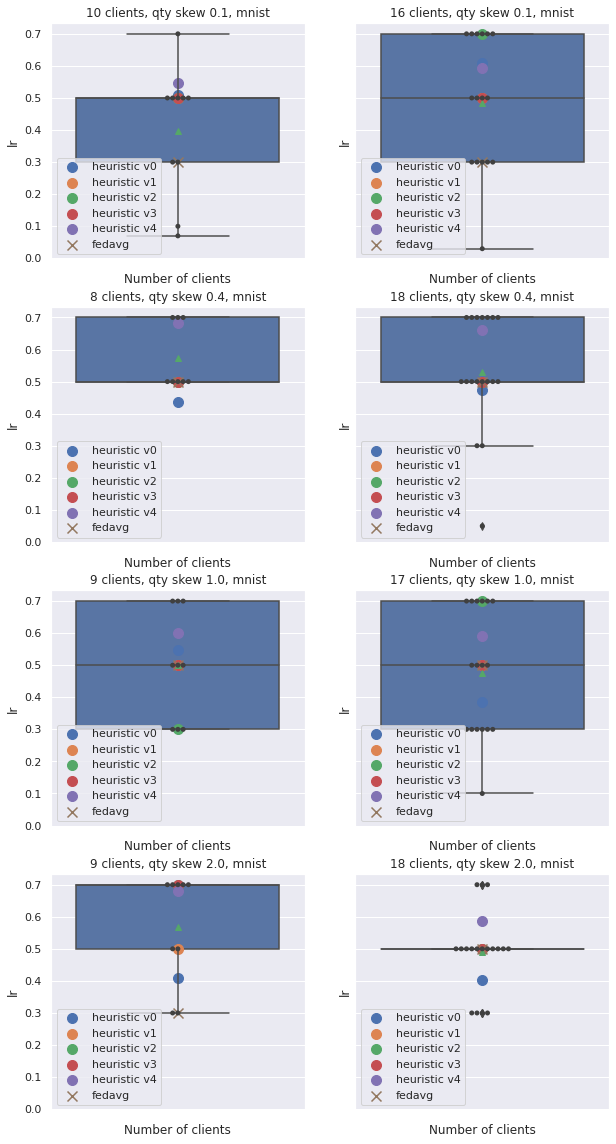

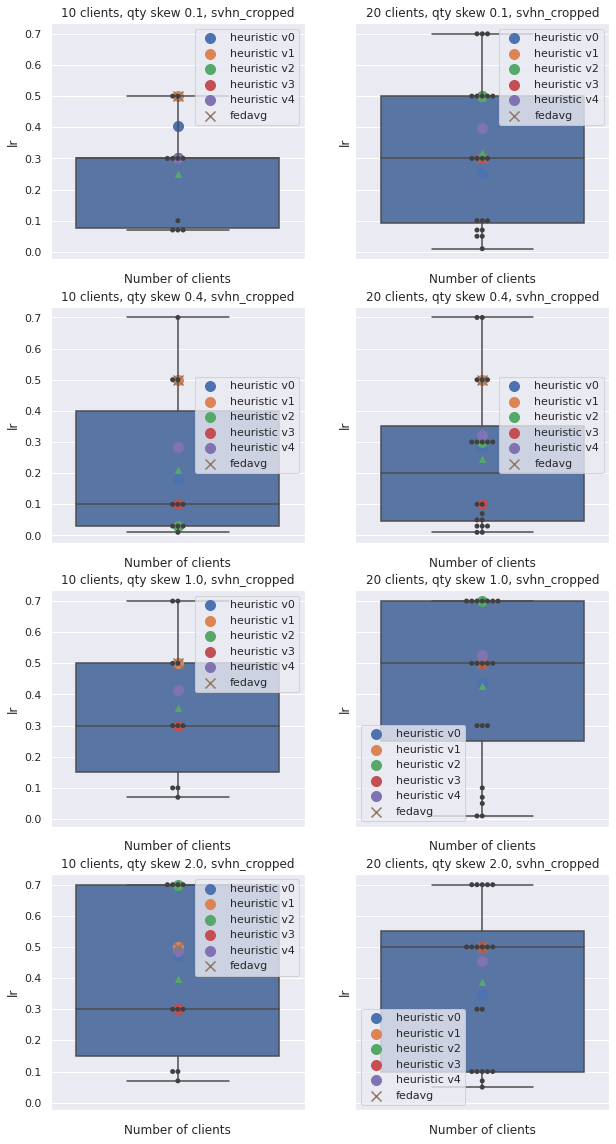

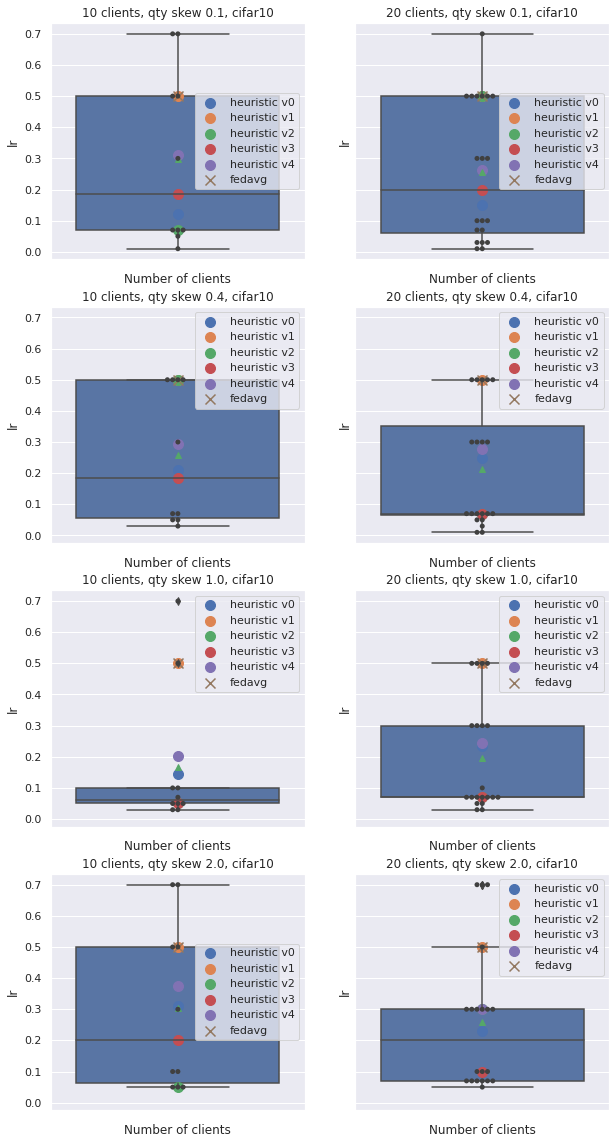

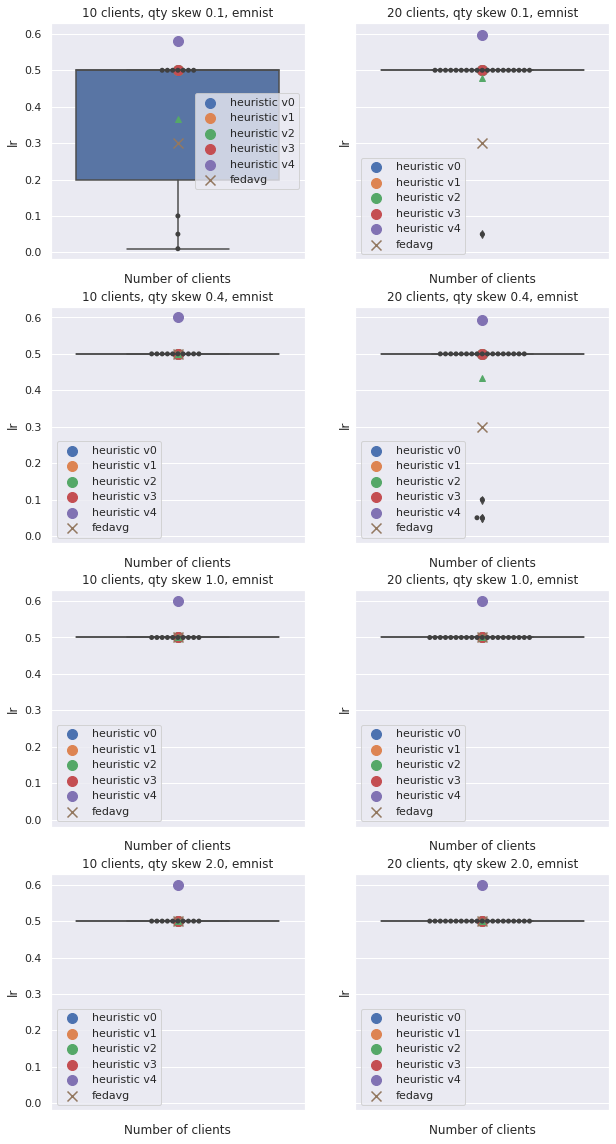

In [8]:
lr_qty_agg_es, (X_lr_qty, y_lr_qty, y_hat_lr_qty) = \
    get_experiment_results(skew_type="qty", hp_name="lr",
                           versions=(0, 1, 2, 3, 4), plot=True)

In [9]:
print_results(
    lr_qty_agg_es,
    X_lr_qty,
    y_lr_qty,
    y_hat_lr_qty,
    "lr"
)

HEURISTIC RESULTS
Heuristic 0 MAE: 0.157 ± 0.118 (Bias: -0.078)
Heuristic 0 accuracy: 0.40625
Heuristic 1 MAE: 0.044 ± 0.083 (Bias: +0.044)
Heuristic 1 accuracy: 0.78125
Heuristic 2 MAE: 0.189 ± 0.165 (Bias: -0.039)
Heuristic 2 accuracy: 0.4375
Heuristic 3 MAE: 0.179 ± 0.166 (Bias: -0.092)
Heuristic 3 accuracy: 0.40625
Heuristic 4 MAE: 0.172 ± 0.090 (Bias: +0.018)
Heuristic 4 accuracy: 0.46875
BASELINE RESULTS
Mean MAE: 0.136 ± 0.109 (Bias: -0.071)
Median MAE: 0.173 ± 0.159 (Bias: -0.085)

X [0.3, 0.5, 0.5, 0.5, 0.7, 0.3, 0.5, 0.07, 0.1, 0.5]
y 0.3
y_hat [0.50927750021, 0.5, 0.5, 0.5, 0.5460321232075251]
X [0.7, 0.5, 0.5, 0.3, 0.3, 0.7, 0.7, 0.7, 0.3, 0.5, 0.7, 0.03, 0.3, 0.3, 0.5, 0.7]
y 0.3
y_hat [0.609902, 0.5, 0.7, 0.5, 0.5949897461965177]
X [0.5, 0.7, 0.5, 0.5, 0.5, 0.7, 0.5, 0.7]
y 0.5
y_hat [0.436761667, 0.5, 0.5, 0.5, 0.6812378522797353]
X [0.3, 0.7, 0.7, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7, 0.05, 0.3, 0.5, 0.7, 0.5, 0.5, 0.5, 0.5, 0.7]
y 0.5
y_hat [0.47465750000000007, 0.5, 0.5, 0.5,

Comments:
- we should average the params, only for quantity skew we should either average or the take weighted average.
- If the clients that found 0.3 are the ones having the higher number of data samples or more normal distribution, we should for sure go for weighted average

## Momentum

### Feature skew - Momentum

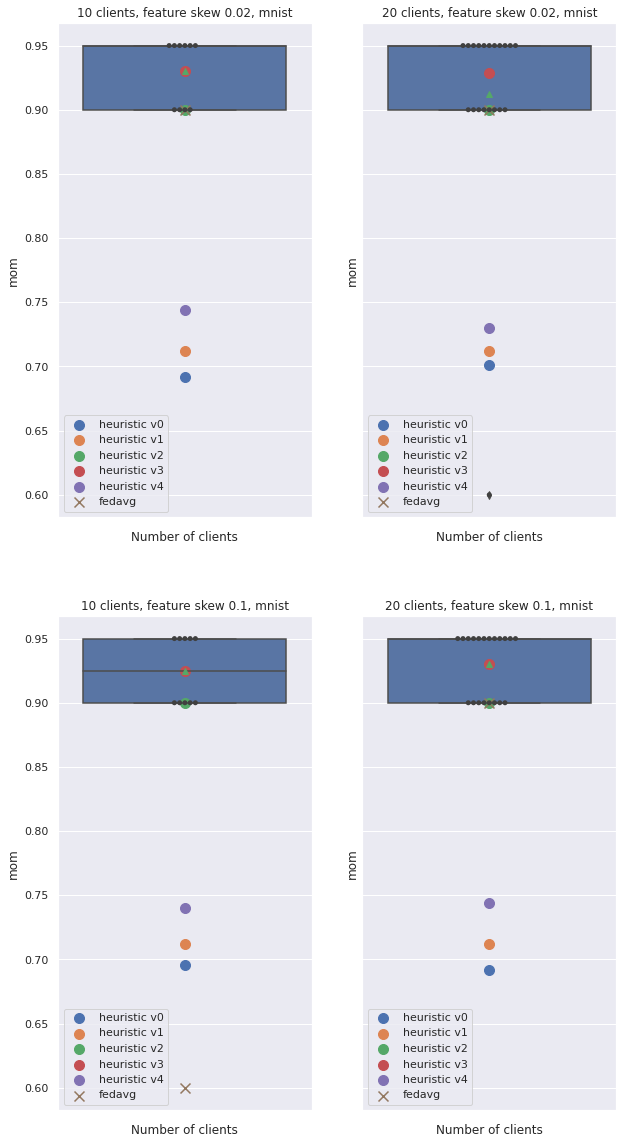

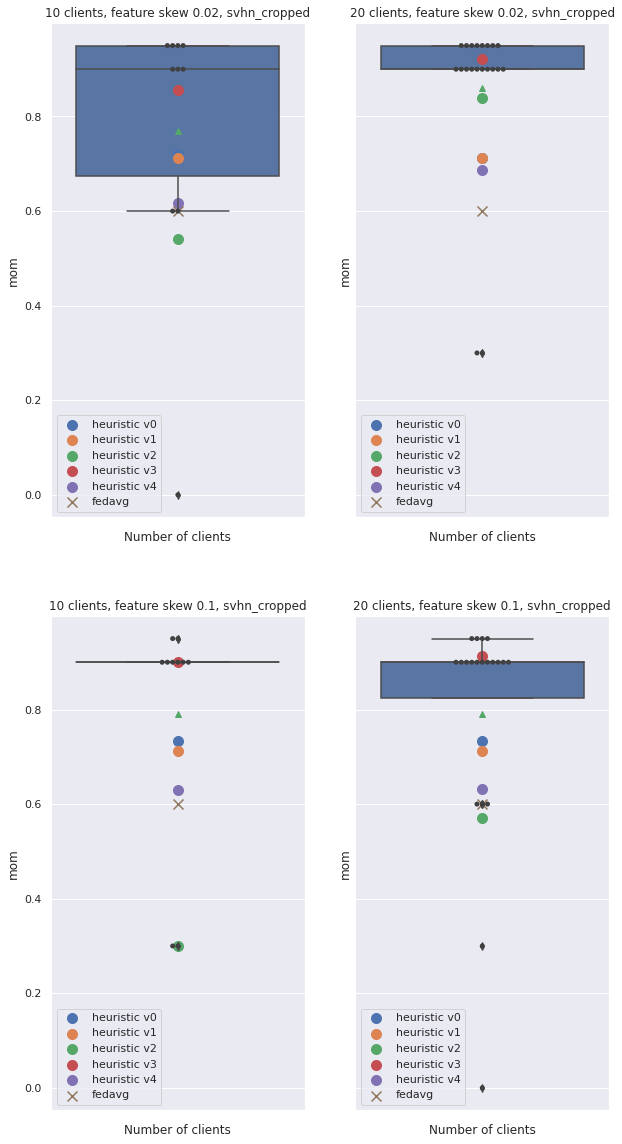

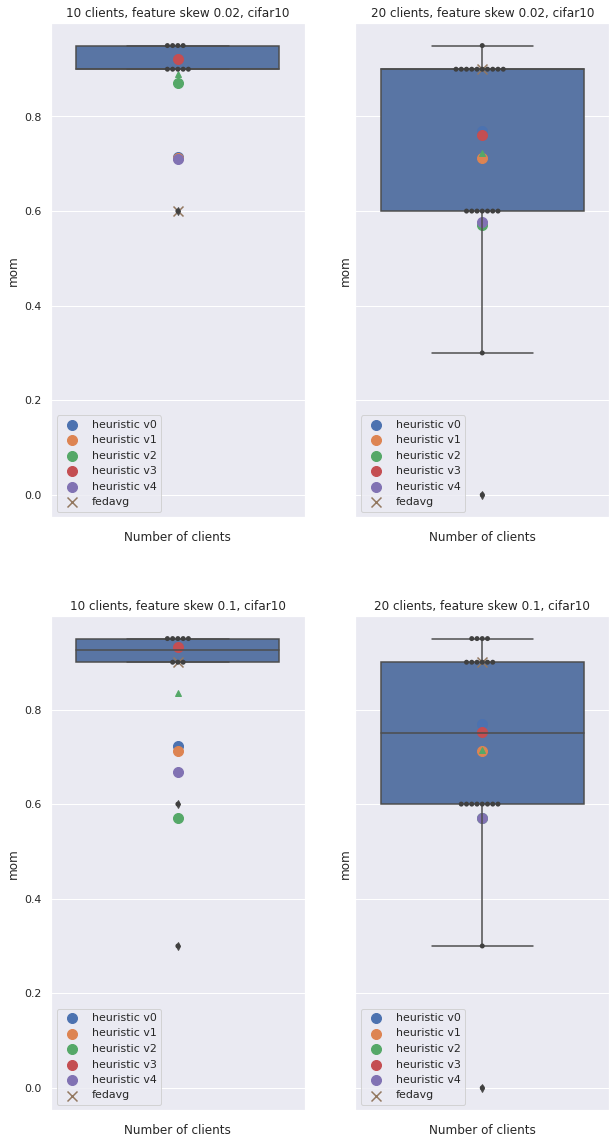

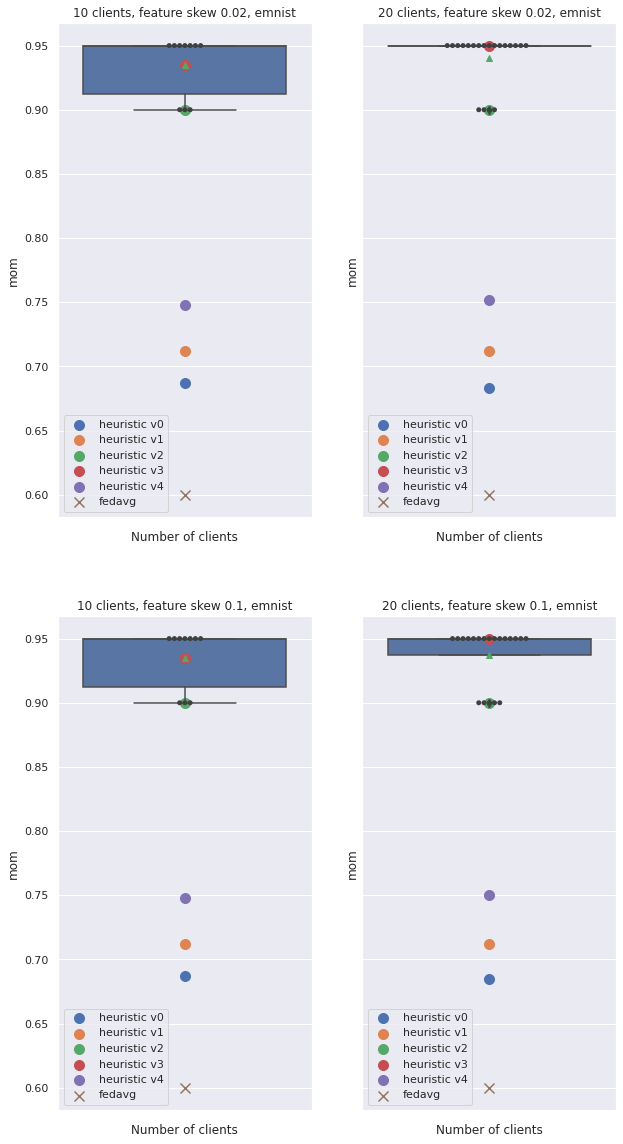

In [10]:
mom_feature_agg_es, (X_mom_feature, y_mom_feature, y_hat_mom_feature) = \
    get_experiment_results(skew_type="feature", hp_name="mom",
                           versions=(0, 1, 2, 3, 4), plot=True)

In [11]:
print_results(
    mom_feature_agg_es,
    X_mom_feature,
    y_mom_feature,
    y_hat_mom_feature,
    "mom"
)

HEURISTIC RESULTS
Heuristic 0 MAE: 0.132 ± 0.043 (Bias: -0.000)
Heuristic 0 accuracy: 0.75
Heuristic 1 MAE: 0.141 ± 0.037 (Bias: -0.001)
Heuristic 1 accuracy: 0.625
Heuristic 2 MAE: 0.212 ± 0.133 (Bias: +0.039)
Heuristic 2 accuracy: 0.3125
Heuristic 3 MAE: 0.226 ± 0.128 (Bias: +0.190)
Heuristic 3 accuracy: 0.375
Heuristic 4 MAE: 0.149 ± 0.087 (Bias: -0.022)
Heuristic 4 accuracy: 0.5
BASELINE RESULTS
Mean MAE: 0.205 ± 0.116 (Bias: +0.151)
Median MAE: 0.222 ± 0.134 (Bias: +0.203)

X [0.9, 0.95, 0.95, 0.95, 0.95, 0.9, 0.95, 0.95, 0.9, 0.9]
y 0.9
y_hat [0.6915, 0.712, 0.9, 0.93, 0.7439804160842418]
X [0.95, 0.9, 0.9, 0.95, 0.9, 0.95, 0.95, 0.9, 0.95, 0.95, 0.95, 0.9, 0.9, 0.6, 0.95, 0.95, 0.95, 0.95, 0.9, 0.9]
y 0.9
y_hat [0.701125, 0.712, 0.9, 0.9289473684210525, 0.7299580973496247]
X [0.95, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95, 0.9, 0.9, 0.95]
y 0.6
y_hat [0.69575, 0.712, 0.9, 0.925, 0.740063523360227]
X [0.9, 0.95, 0.95, 0.9, 0.9, 0.95, 0.9, 0.95, 0.95, 0.9, 0.95, 0.95, 0.9, 0.95, 0.95, 0.9,

Comments:
- In EMNIST and SVHN_CROPPED: fedavg momentum tends to be in the 75% percentile of clients' momentums.
- Momentum seems to depend on skew and dataset, which the heuristic function does not consider

### Label skew - Momentum Results

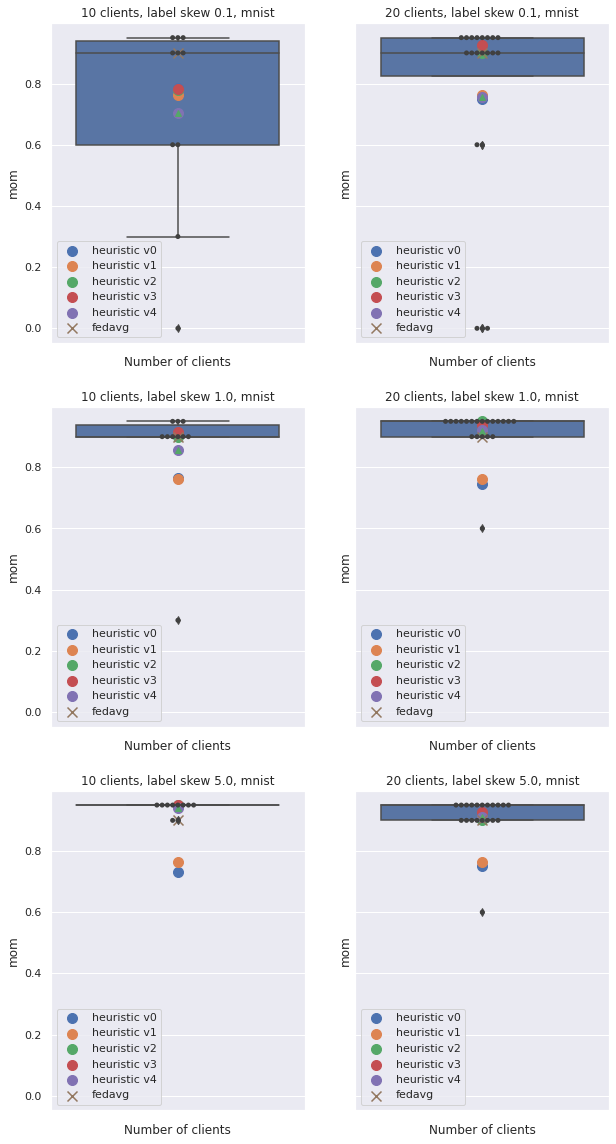

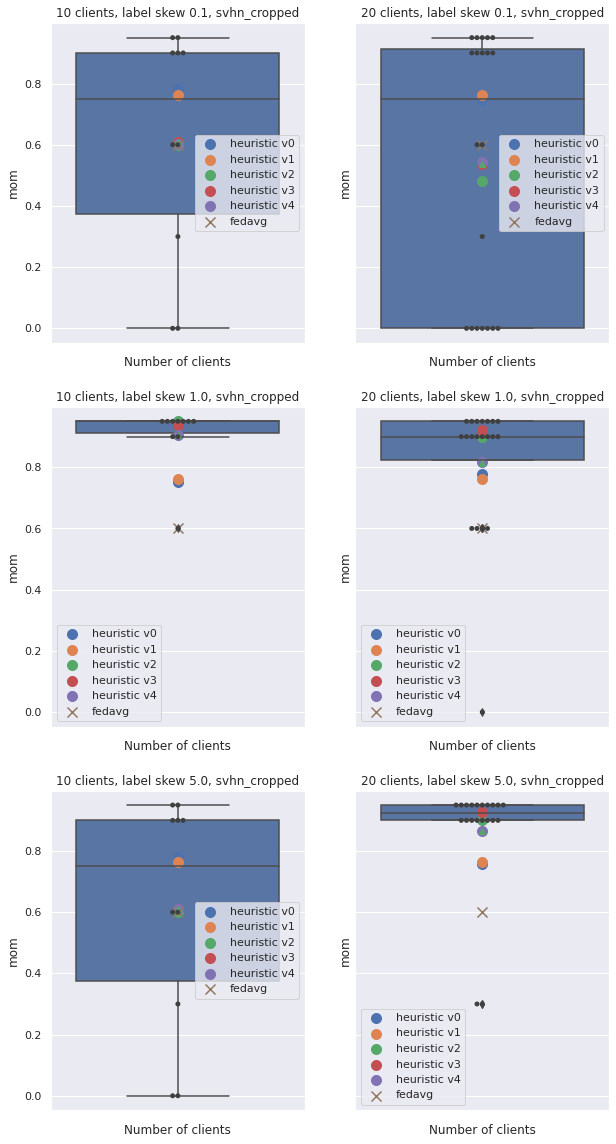

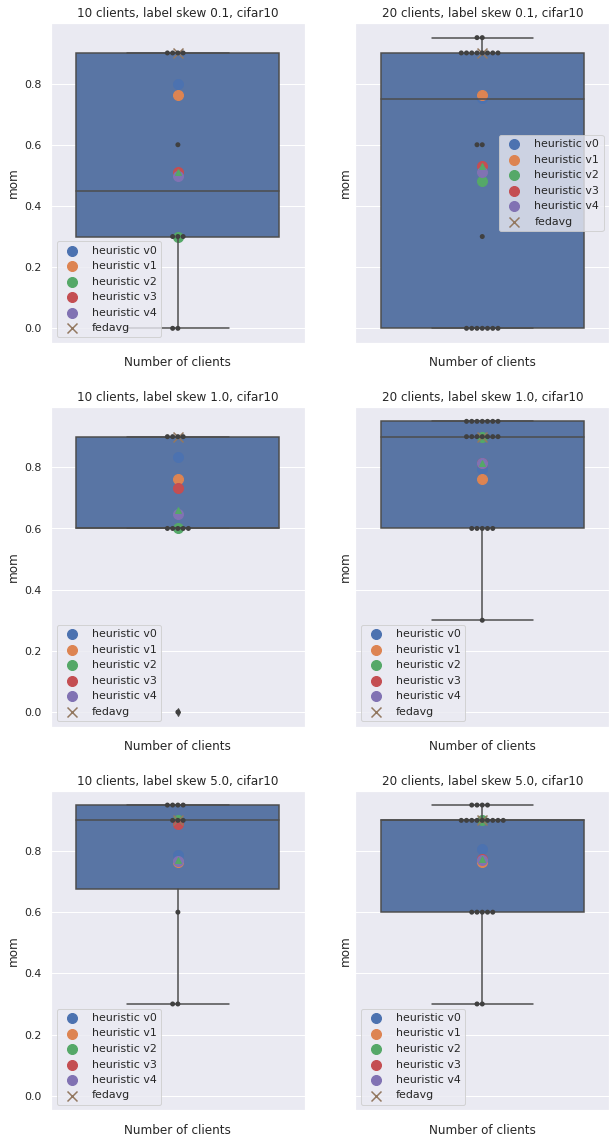

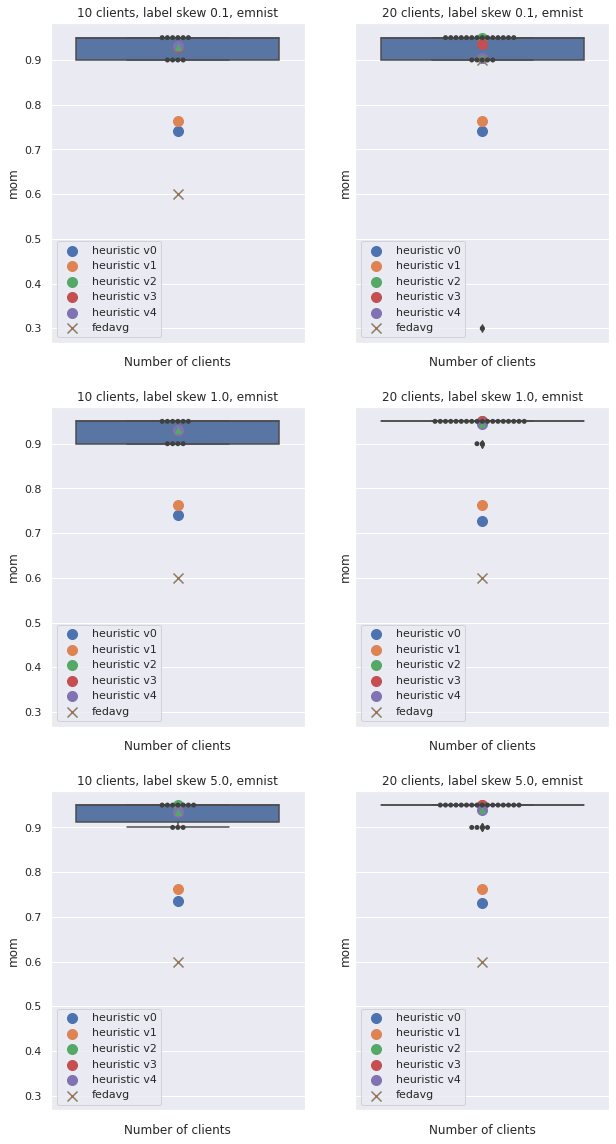

In [12]:
mom_label_agg_es, (X_mom_label, y_mom_label, y_hat_mom_label) = \
    get_experiment_results(skew_type="label", hp_name="mom",
                           versions=(0, 1, 2, 3, 4), plot=True)

In [13]:
print_results(
    mom_label_agg_es,
    X_mom_label,
    y_mom_label,
    y_hat_mom_label,
    "mom"
)

HEURISTIC RESULTS
Heuristic 0 MAE: 0.139 ± 0.028 (Bias: +0.000)
Heuristic 0 accuracy: 0.6666666666666666
Heuristic 1 MAE: 0.149 ± 0.013 (Bias: +0.001)
Heuristic 1 accuracy: 0.5416666666666666
Heuristic 2 MAE: 0.182 ± 0.177 (Bias: +0.052)
Heuristic 2 accuracy: 0.5416666666666666
Heuristic 3 MAE: 0.176 ± 0.147 (Bias: +0.065)
Heuristic 3 accuracy: 0.5416666666666666
Heuristic 4 MAE: 0.183 ± 0.138 (Bias: +0.030)
Heuristic 4 accuracy: 0.5
BASELINE RESULTS
Mean MAE: 0.181 ± 0.135 (Bias: +0.032)
Median MAE: 0.178 ± 0.153 (Bias: +0.103)

X [0.9, 0.9, 0.95, 0.95, 0.6, 0.6, 0.9, 0.0, 0.95, 0.3]
y 0.9
y_hat [0.7862500000000001, 0.763, 0.78, 0.7833333333333333, 0.7043734050723619]
X [0.9, 0.0, 0.95, 0.0, 0.95, 0.6, 0.6, 0.95, 0.95, 0.9, 0.95, 0.95, 0.9, 0.95, 0.9, 0.95, 0.9, 0.0, 0.9, 0.9]
y 0.9
y_hat [0.7505000000000001, 0.763, 0.9, 0.9266666666666666, 0.7570371216318612]
X [0.3, 0.9, 0.95, 0.95, 0.9, 0.95, 0.9, 0.9, 0.9, 0.9]
y 0.9
y_hat [0.76525, 0.763, 0.9000000000000001, 0.9166666666666666, 0

Comments:


### Quantity skew - Momentum Results

File for client 16 in mnist (0.1, 20, qty) does not exist.
File for client 17 in mnist (0.1, 20, qty) does not exist.
File for client 18 in mnist (0.1, 20, qty) does not exist.
File for client 19 in mnist (0.1, 20, qty) does not exist.
File for client 8 in mnist (0.4, 10, qty) does not exist.
File for client 9 in mnist (0.4, 10, qty) does not exist.
File for client 18 in mnist (0.4, 20, qty) does not exist.
File for client 19 in mnist (0.4, 20, qty) does not exist.
File for client 9 in mnist (1.0, 10, qty) does not exist.
File for client 17 in mnist (1.0, 20, qty) does not exist.
File for client 18 in mnist (1.0, 20, qty) does not exist.
File for client 19 in mnist (1.0, 20, qty) does not exist.
File for client 9 in mnist (2.0, 10, qty) does not exist.
File for client 18 in mnist (2.0, 20, qty) does not exist.
File for client 19 in mnist (2.0, 20, qty) does not exist.


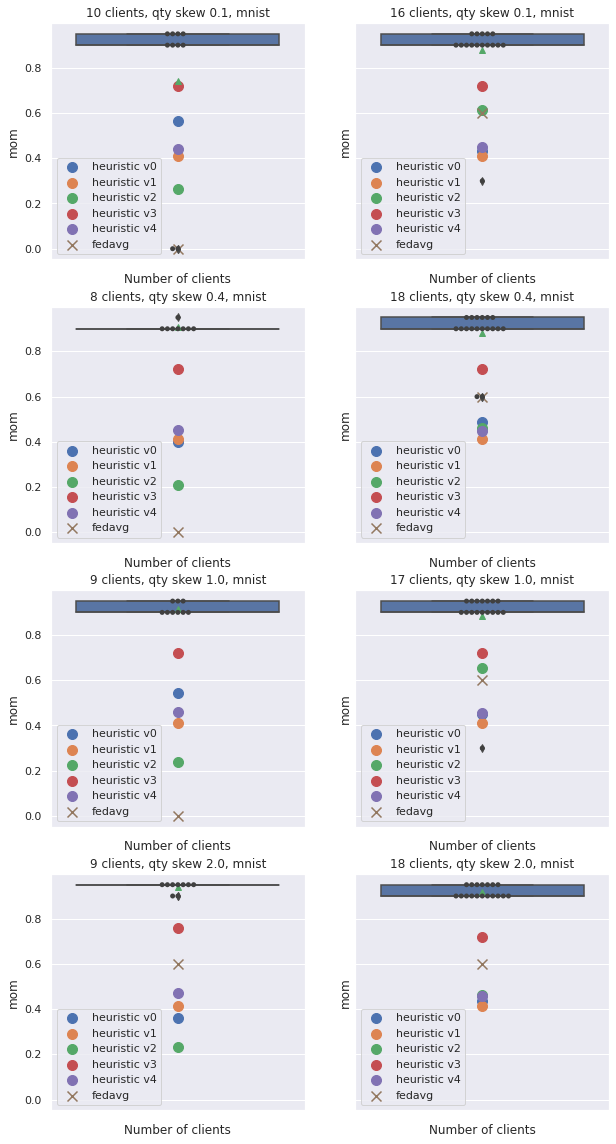

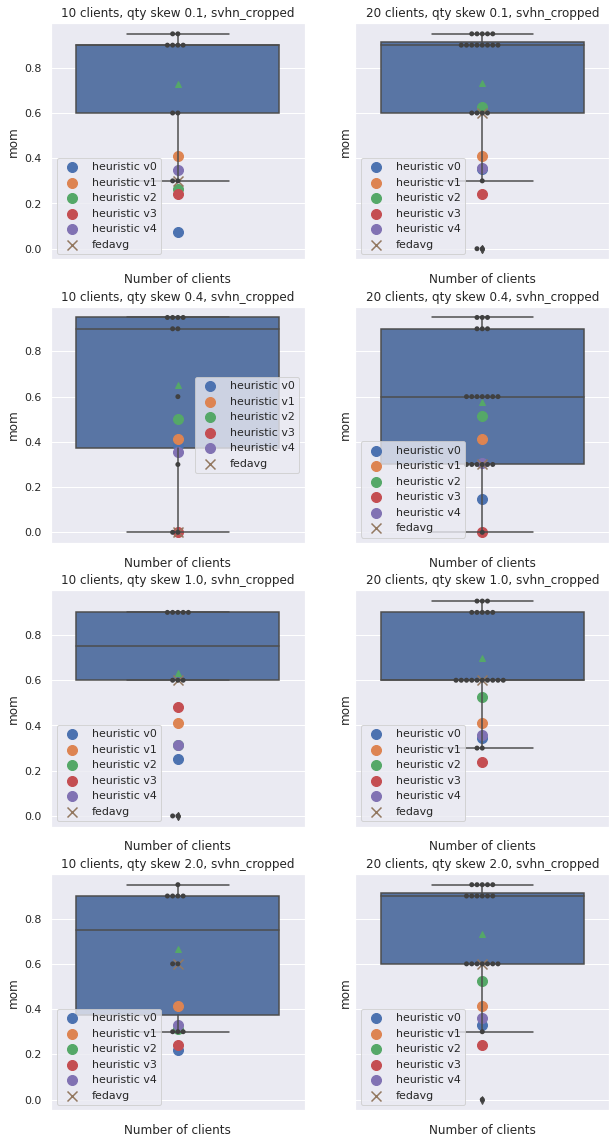

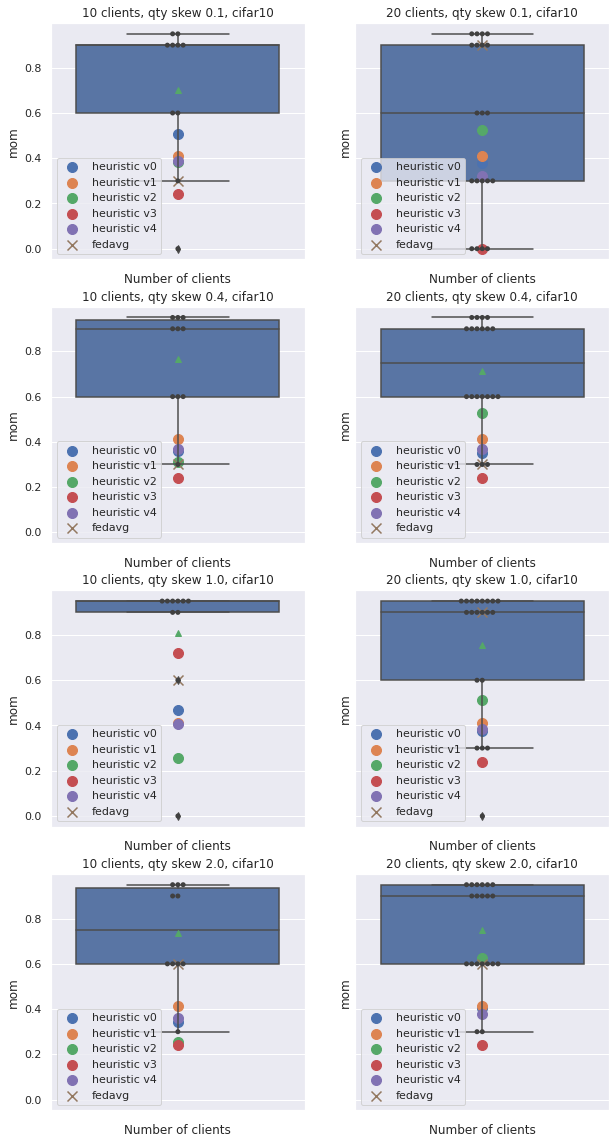

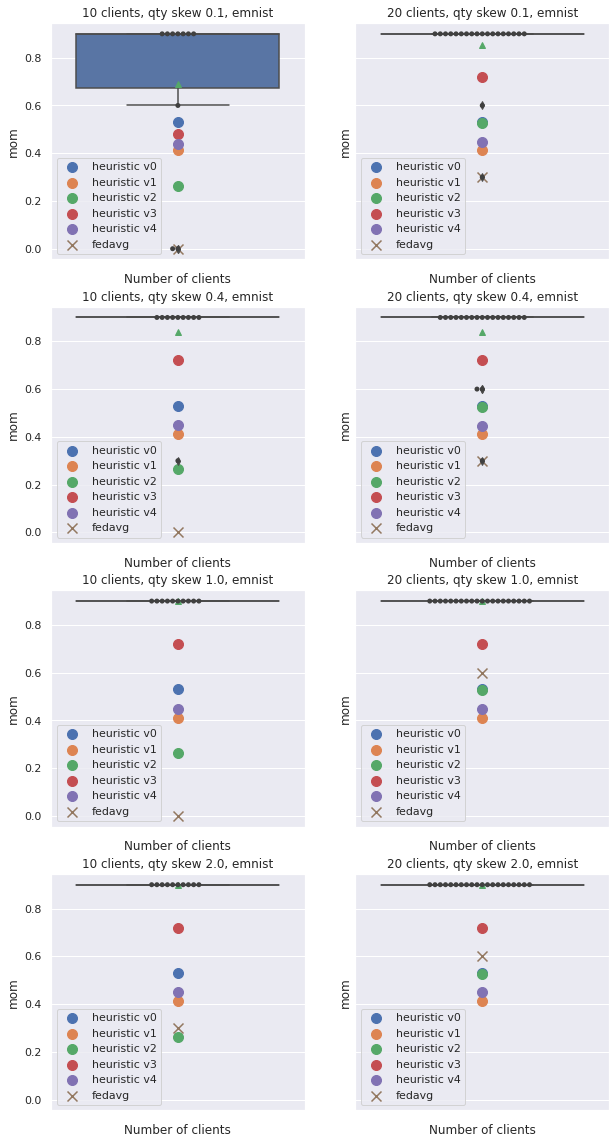

In [14]:
mom_qty_agg_es, (X_mom_qty, y_mom_qty, y_hat_mom_qty) = \
    get_experiment_results(skew_type="qty", hp_name="mom",
                           versions=(0, 1, 2, 3, 4), plot=True)

In [15]:
print_results(
    mom_qty_agg_es,
    X_mom_qty,
    y_mom_qty,
    y_hat_mom_qty,
    "mom"
)

HEURISTIC RESULTS
Heuristic 0 MAE: 0.280 ± 0.160 (Bias: -0.000)
Heuristic 0 accuracy: 0.21875
Heuristic 1 MAE: 0.237 ± 0.125 (Bias: -0.001)
Heuristic 1 accuracy: 0.25
Heuristic 2 MAE: 0.192 ± 0.131 (Bias: +0.002)
Heuristic 2 accuracy: 0.4375
Heuristic 3 MAE: 0.335 ± 0.252 (Bias: +0.061)
Heuristic 3 accuracy: 0.40625
Heuristic 4 MAE: 0.244 ± 0.151 (Bias: -0.009)
Heuristic 4 accuracy: 0.34375
BASELINE RESULTS
Mean MAE: 0.403 ± 0.258 (Bias: +0.371)
Median MAE: 0.462 ± 0.279 (Bias: +0.444)

X [0.95, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95, 0.0, 0.0, 0.9]
y 0.0
y_hat [0.5635900005999999, 0.412, 0.2631578947368421, 0.7200000000000001, 0.4395325228844924]
X [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95, 0.95, 0.95, 0.9, 0.9, 0.9, 0.3]
y 0.6
y_hat [0.43200250000000007, 0.412, 0.6153846153846154, 0.7200000000000001, 0.4499439081799598]
X [0.95, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
y 0.0
y_hat [0.39970166725, 0.412, 0.21052631578947367, 0.7200000000000001, 0.4529388495687564]
X [0.9, 0.9, 0.9, 0.9,

Comments:

## Batch Size

### Feature skew - Batch Size

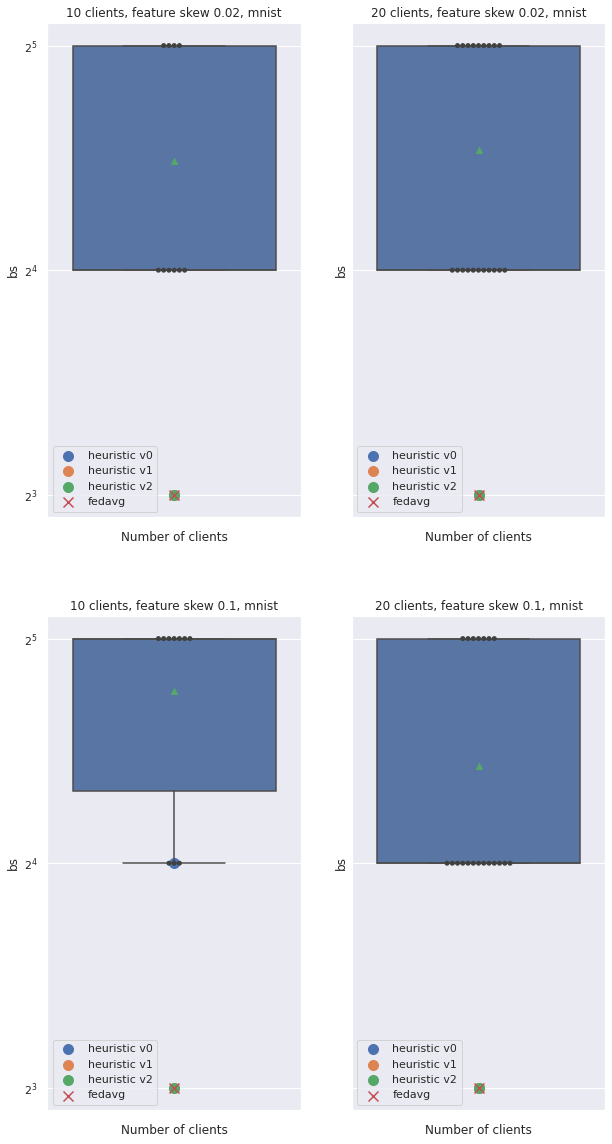

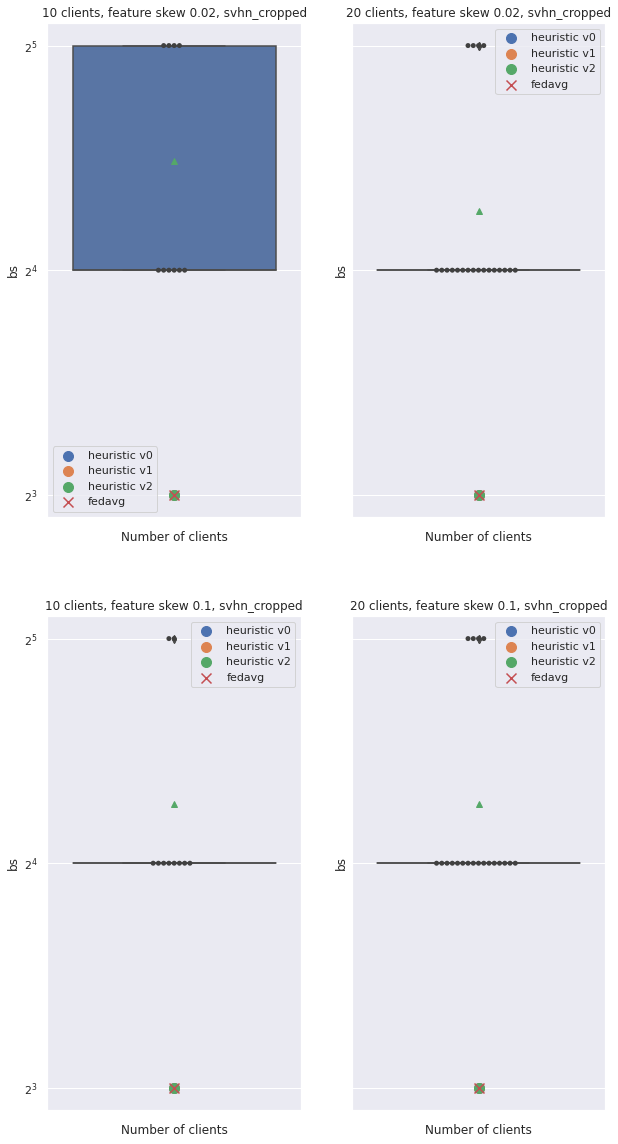

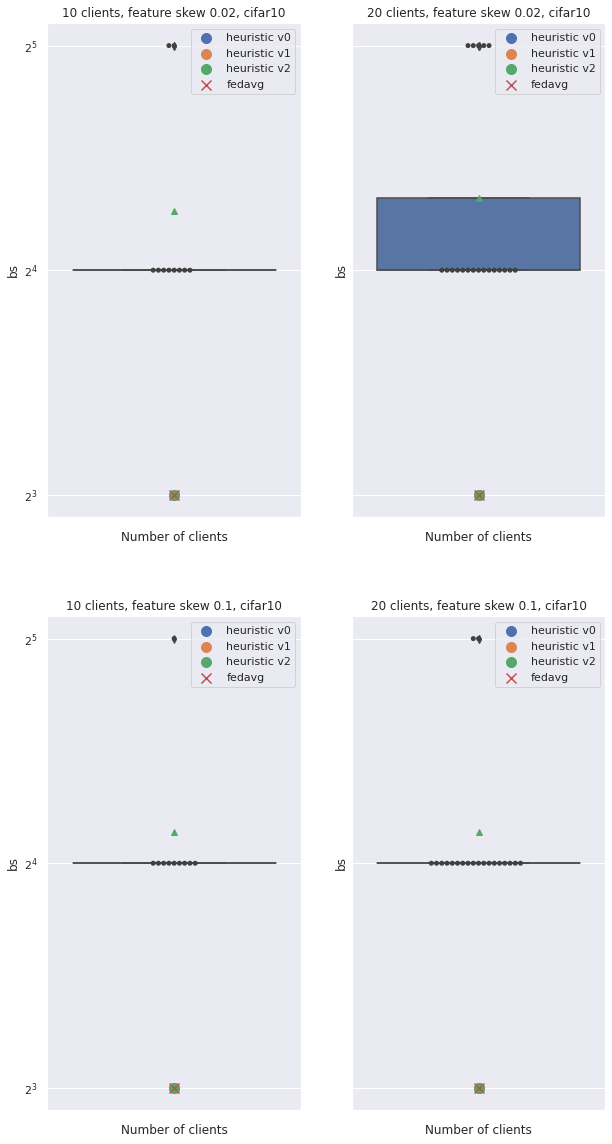

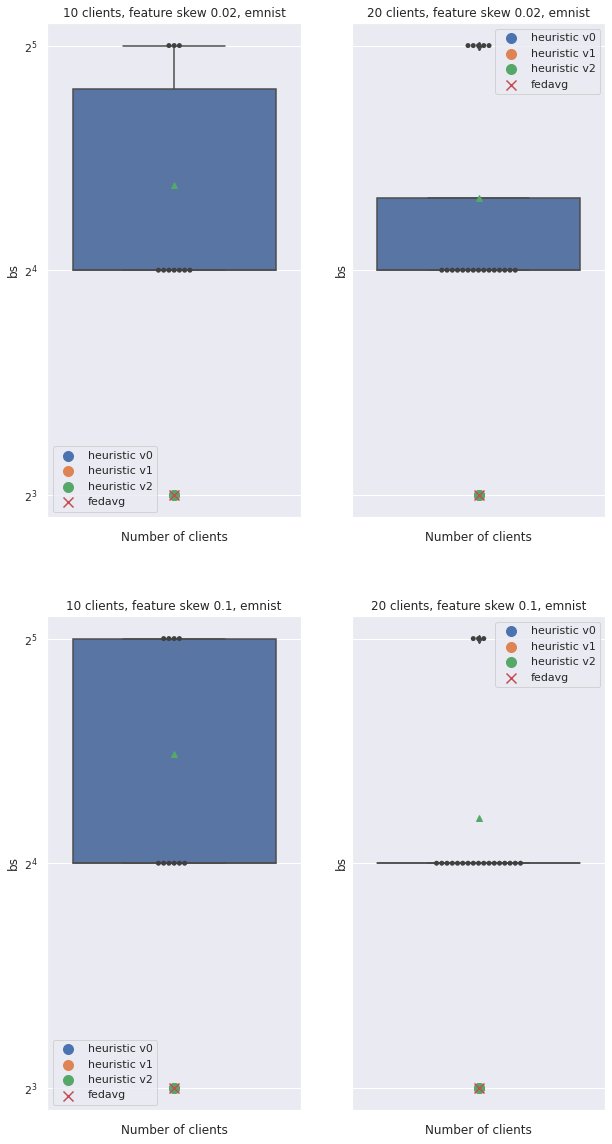

In [16]:
bs_feature_agg_es, (X_bs_feature, y_bs_feature, y_hat_bs_feature) = \
    get_experiment_results(skew_type="feature", hp_name="bs",
                           versions=(0, 1, 2), plot=True)

In [17]:
print_results(
    bs_feature_agg_es,
    X_bs_feature,
    y_bs_feature,
    y_hat_bs_feature,
    "bs"
)

HEURISTIC RESULTS
Heuristic 0 MAE: 0.500 ± 1.936 (Bias: +0.500)
Heuristic 0 accuracy: 0.9375
Heuristic 1 MAE: 0.000 ± 0.000 (Bias: +0.000)
Heuristic 1 accuracy: 1.0
Heuristic 2 MAE: 0.000 ± 0.000 (Bias: +0.000)
Heuristic 2 accuracy: 1.0
BASELINE RESULTS
Mean MAE: 12.650 ± 2.404 (Bias: +12.650)
Median MAE: 9.000 ± 3.873 (Bias: +9.000)

X [16, 32, 32, 16, 32, 16, 16, 32, 16, 16]
y 8
y_hat [8, 8, 8]
X [32, 16, 16, 32, 32, 32, 16, 16, 32, 32, 32, 16, 32, 16, 16, 16, 16, 32, 16, 16]
y 8
y_hat [8, 8, 8]
X [32, 16, 32, 16, 32, 16, 32, 32, 32, 32]
y 8
y_hat [16, 8, 8]
X [16, 32, 16, 16, 32, 32, 16, 32, 16, 16, 16, 32, 16, 32, 32, 16, 16, 16, 16, 16]
y 8
y_hat [8, 8, 8]
X [16, 32, 16, 16, 32, 16, 16, 32, 16, 32]
y 8
y_hat [8, 8, 8]
X [16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 32, 16, 16, 32, 16, 16, 16]
y 8
y_hat [8, 8, 8]
X [16, 32, 16, 16, 32, 16, 16, 16, 16, 16]
y 8
y_hat [8, 8, 8]
X [16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 32, 16, 16, 16, 16, 16, 32]
y 8
y_hat [8, 8, 8

Comments:
- Mean between two batch sizes does not make sense, since the fedavg batch size is discrete
- Solution: project aggregation result to the closest power of two
- Optimal fedavg batch size equals 8 for all settings (smallest value in grid).
- Optimal fedavg batch size consistently smaller than client batch sizes.

### Label skew - Batch Size Results

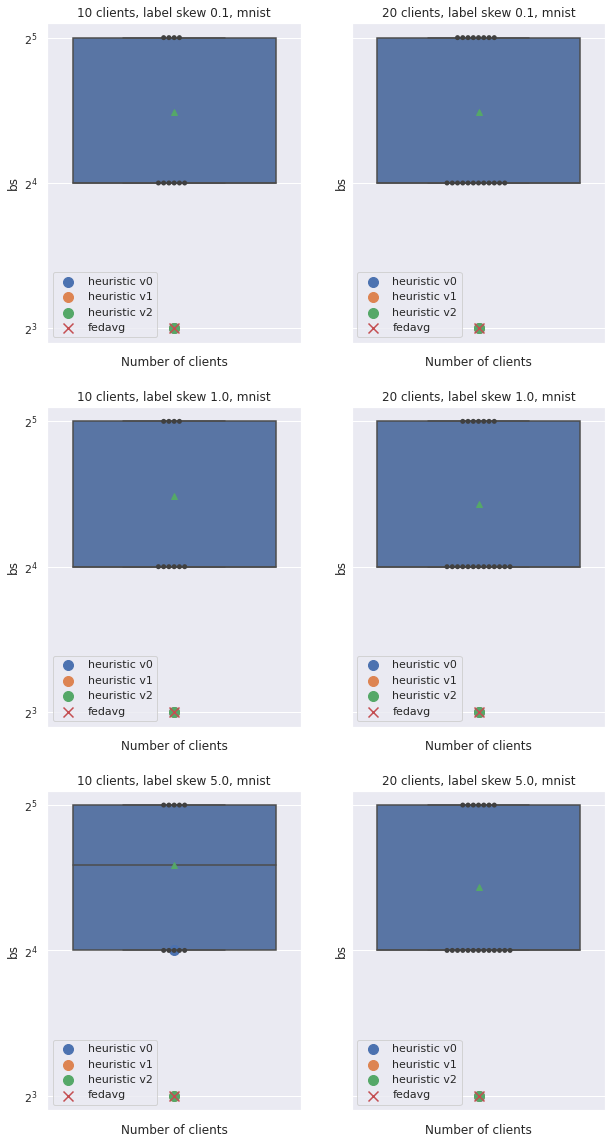

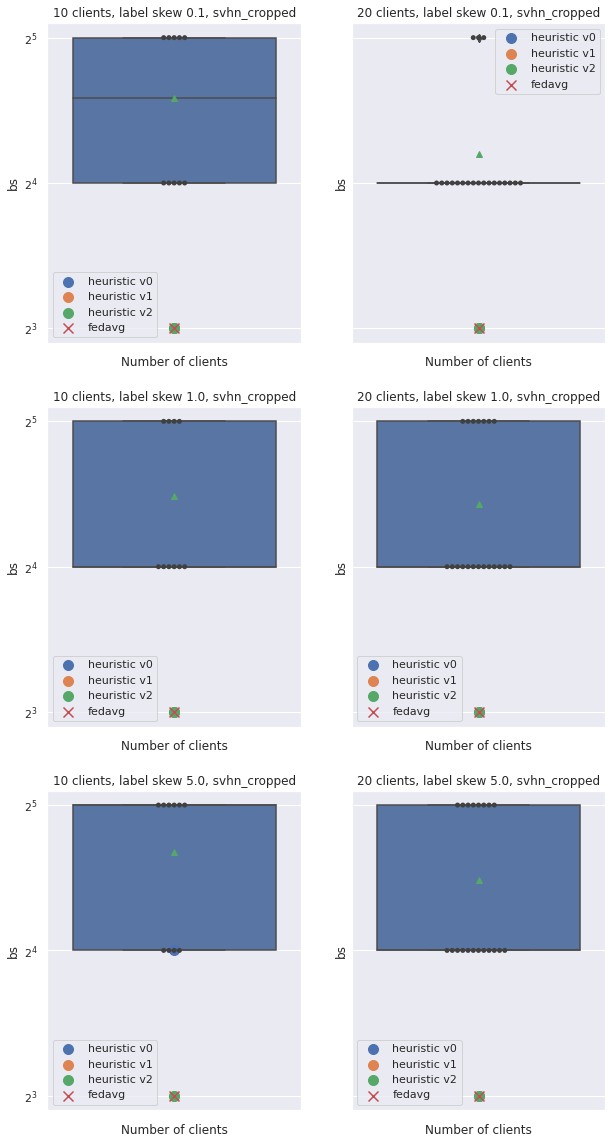

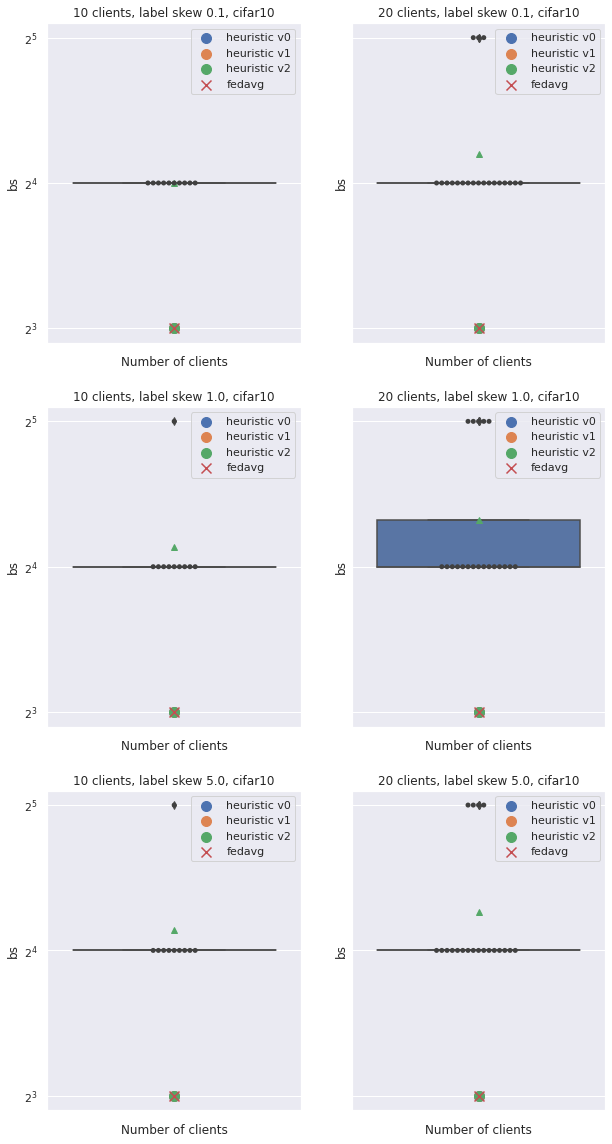

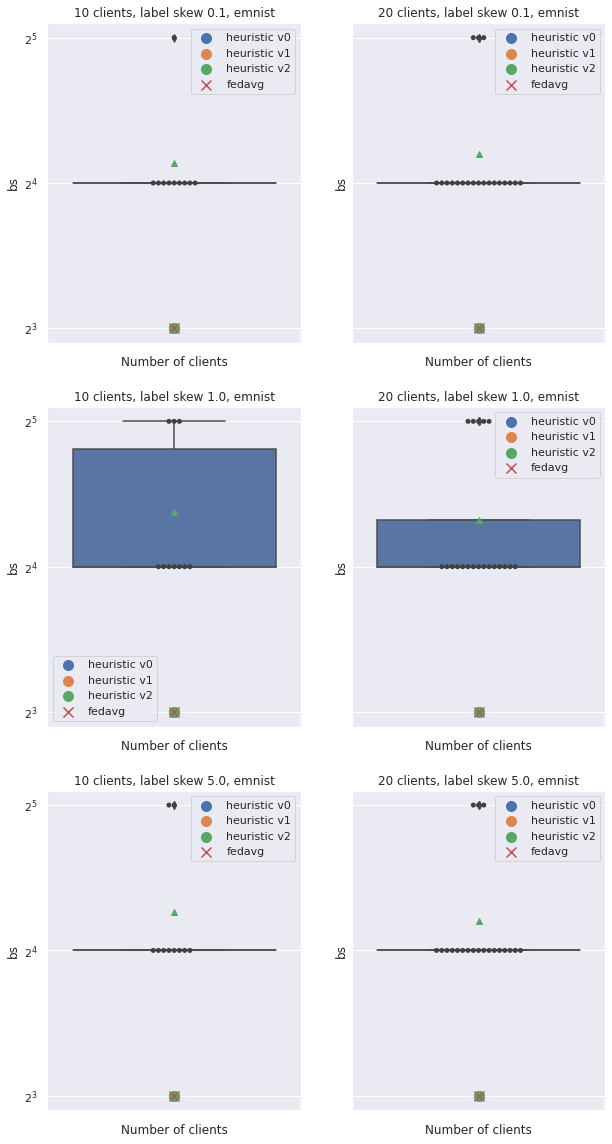

In [18]:
bs_label_agg_es, (X_bs_label, y_bs_label, y_hat_bs_label) = \
    get_experiment_results(skew_type="label", hp_name="bs",
                           versions=(0, 1, 2), plot=True)

In [19]:
print_results(
    bs_label_agg_es,
    X_bs_label,
    y_bs_label,
    y_hat_bs_label,
    "bs"
)

HEURISTIC RESULTS
Heuristic 0 MAE: 0.667 ± 2.211 (Bias: +0.667)
Heuristic 0 accuracy: 0.9166666666666666
Heuristic 1 MAE: 0.000 ± 0.000 (Bias: +0.000)
Heuristic 1 accuracy: 1.0
Heuristic 2 MAE: 0.000 ± 0.000 (Bias: +0.000)
Heuristic 2 accuracy: 1.0
BASELINE RESULTS
Mean MAE: 12.500 ± 2.409 (Bias: +12.500)
Median MAE: 9.333 ± 3.771 (Bias: +9.333)

X [16, 16, 32, 32, 16, 16, 16, 16, 32, 32]
y 8
y_hat [8, 8, 8]
X [16, 16, 32, 16, 16, 16, 32, 32, 32, 16, 32, 16, 32, 32, 16, 32, 16, 16, 16, 16]
y 8
y_hat [8, 8, 8]
X [16, 16, 32, 16, 16, 32, 32, 16, 16, 32]
y 8
y_hat [8, 8, 8]
X [32, 32, 16, 32, 16, 16, 32, 16, 16, 16, 32, 16, 16, 16, 16, 16, 32, 16, 32, 16]
y 8
y_hat [8, 8, 8]
X [32, 16, 32, 16, 16, 16, 32, 16, 32, 32]
y 8
y_hat [16, 8, 8]
X [32, 16, 16, 16, 32, 16, 32, 16, 16, 16, 16, 32, 16, 16, 16, 32, 16, 32, 16, 32]
y 8
y_hat [8, 8, 8]
X [16, 32, 16, 32, 16, 32, 32, 16, 16, 32]
y 8
y_hat [8, 8, 8]
X [32, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16]
y 8
y_

Comments:
- Optimal fedavg batch size equals 8 (smallest in grid search) for all settings.
- Optimal fedavg batch size consistently smaller than client batch sizes.

### Quantity skew - Batch Size Results

File for client 16 in mnist (0.1, 20, qty) does not exist.
File for client 17 in mnist (0.1, 20, qty) does not exist.
File for client 18 in mnist (0.1, 20, qty) does not exist.
File for client 19 in mnist (0.1, 20, qty) does not exist.
File for client 8 in mnist (0.4, 10, qty) does not exist.
File for client 9 in mnist (0.4, 10, qty) does not exist.
File for client 18 in mnist (0.4, 20, qty) does not exist.
File for client 19 in mnist (0.4, 20, qty) does not exist.
File for client 9 in mnist (1.0, 10, qty) does not exist.
File for client 17 in mnist (1.0, 20, qty) does not exist.
File for client 18 in mnist (1.0, 20, qty) does not exist.
File for client 19 in mnist (1.0, 20, qty) does not exist.
File for client 9 in mnist (2.0, 10, qty) does not exist.
File for client 18 in mnist (2.0, 20, qty) does not exist.
File for client 19 in mnist (2.0, 20, qty) does not exist.


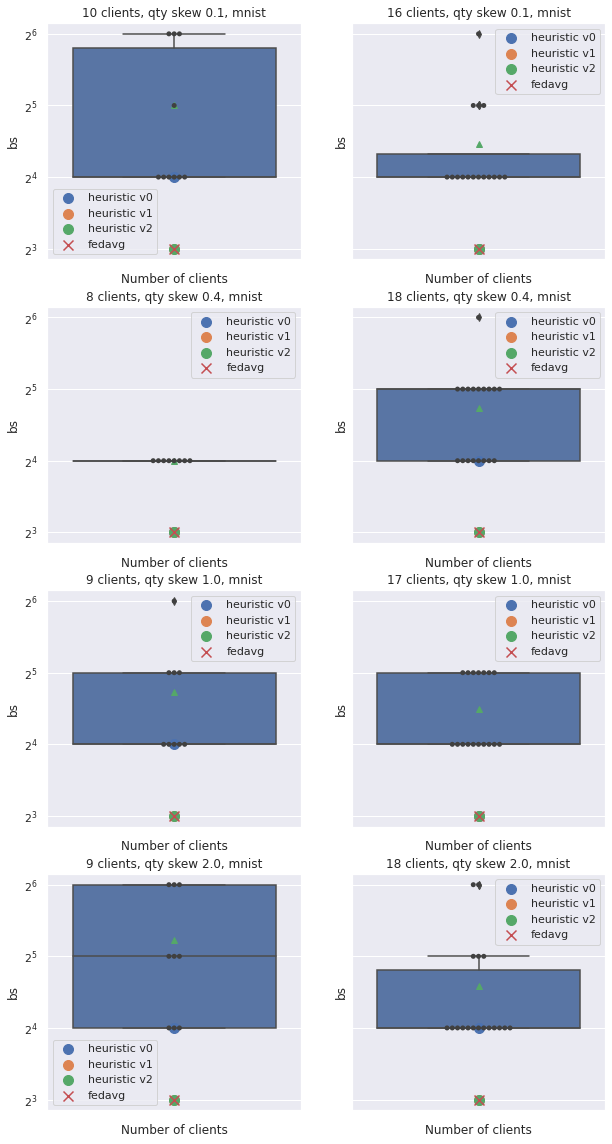

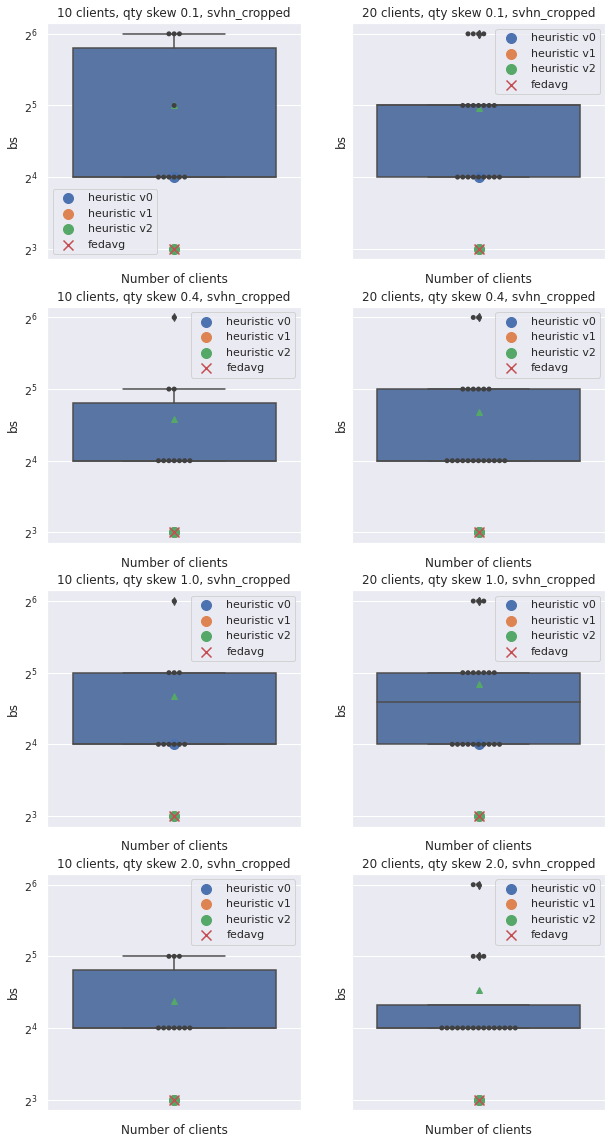

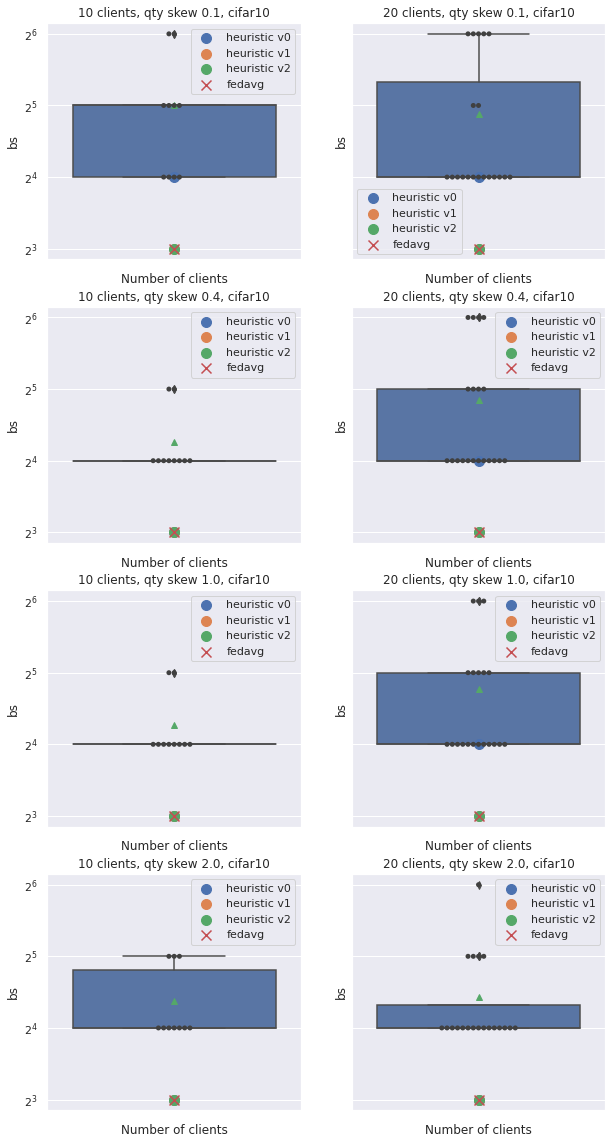

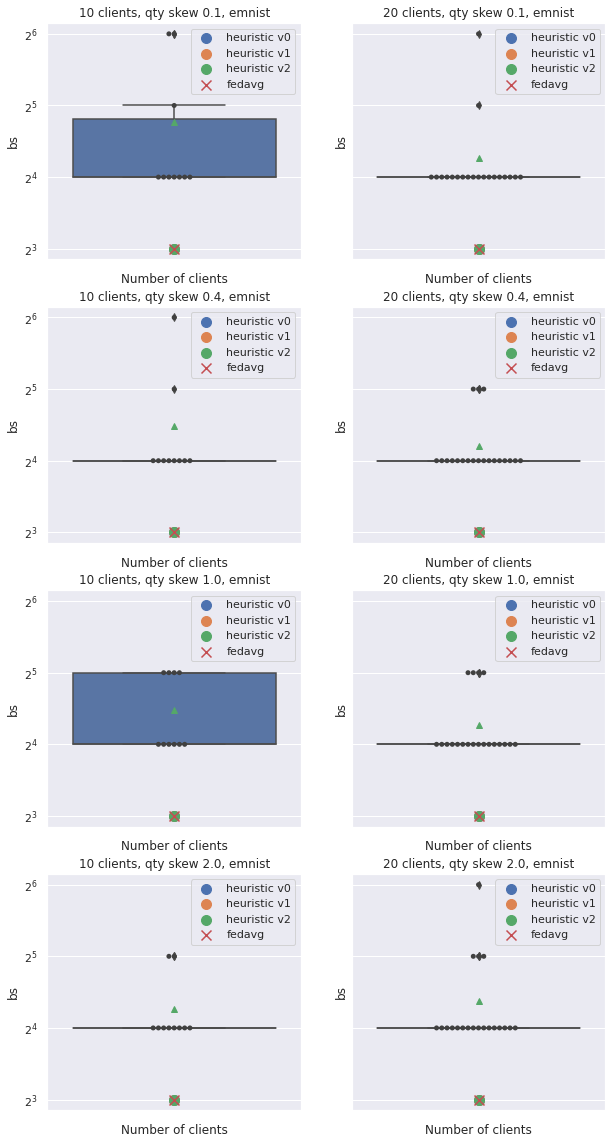

In [20]:
bs_qty_agg_es, (X_bs_qty, y_bs_qty, y_hat_bs_qty) = \
    get_experiment_results(skew_type="qty", hp_name="bs",
                           versions=(0, 1, 2), plot=True)

In [21]:
print_results(
    bs_qty_agg_es,
    X_bs_qty,
    y_bs_qty,
    y_hat_bs_qty,
    "bs"
)

HEURISTIC RESULTS
Heuristic 0 MAE: 3.250 ± 3.929 (Bias: +3.250)
Heuristic 0 accuracy: 0.59375
Heuristic 1 MAE: 0.000 ± 0.000 (Bias: +0.000)
Heuristic 1 accuracy: 1.0
Heuristic 2 MAE: 0.000 ± 0.000 (Bias: +0.000)
Heuristic 2 accuracy: 1.0
BASELINE RESULTS
Mean MAE: 16.552 ± 4.962 (Bias: +16.552)
Median MAE: 10.250 ± 5.379 (Bias: +10.250)

X [32, 16, 16, 16, 64, 16, 64, 16, 64, 16]
y 8
y_hat [16, 8, 8]
X [16, 16, 32, 16, 16, 16, 16, 32, 32, 16, 16, 16, 16, 16, 16, 64]
y 8
y_hat [8, 8, 8]
X [16, 16, 16, 16, 16, 16, 16, 16]
y 8
y_hat [8, 8, 8]
X [16, 32, 16, 16, 32, 32, 32, 16, 64, 32, 32, 16, 32, 16, 16, 32, 16, 32]
y 8
y_hat [16, 8, 8]
X [32, 16, 16, 16, 16, 32, 64, 32, 16]
y 8
y_hat [16, 8, 8]
X [16, 16, 32, 32, 16, 16, 16, 16, 32, 16, 32, 16, 16, 32, 16, 32, 32]
y 8
y_hat [8, 8, 8]
X [16, 32, 64, 32, 16, 64, 16, 64, 32]
y 8
y_hat [16, 8, 8]
X [16, 16, 16, 32, 16, 64, 16, 16, 16, 16, 32, 16, 16, 16, 16, 32, 16, 64]
y 8
y_hat [16, 8, 8]
X [16, 16, 64, 64, 16, 16, 32, 64, 16, 16]
y 8
y_ha

Comments:
- Optimal server batch size equals 8 for all settings.
- Optimal fedavg batch size consistently smaller than client batch sizes.